# Develop Solar Plant Optimization Problem using Excel Interface

Test classes and functions from `optprob` module for comparing different optimization algorithms.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
import skopt

import xlwings as xw

from problems.optprob.problems import (
    solve_problem_with_optimizer, 
    solve_problem_with_optimizer_n_repeats
)
from problems.optprob.plot_utils import (
    function_evaluations_plot, 
    best_guesses_plot, 
    best_guesses_plot_n_repeats
)
from problems.solar_plant_rto.solar_plant_rto import SolarPlantRTO

from excel_tools.opt_problems import MSExcelOptProblem

from platform import python_version
python_version()

'3.12.10'

In [2]:
import lpfgopt
lpfgopt.__version__

'1.0.1'

## Optimization Problem Definition

In [3]:
# Path to Excel file
problems_dir = 'problems'
problem_name = 'solar_plant_rto'
excel_filename = 'Solar Plant Optimization of N-Pumps I-O 2025-08-29.xlsm'
filepath = os.path.join(os.getcwd(), problems_dir, problem_name, excel_filename)

# Check if file exists
if not os.path.exists(filepath):
    raise FileNotFoundError(f"Excel file not found: {filepath}")

# Locations of input-output variables in Excel sheet
# These are in (row, col) format.  They can also be supplied in "A1" style.
cell_refs = {
    'name': ((2, 2), (2, 3)),
    'f(x)': ((6, 13), (6, 14)),
    'x': (
        (5, 8), 
        [
            (6, 8), (9, 8), (10, 8), (11, 8), (12, 8), (13, 8), (14, 8), (15, 8), 
            (16, 8), (17, 8), (18, 8), (19, 8), (20, 8), (21, 8), (22, 8)
        ]
    ),
    'g(x)': None,
    'x_lb': (
        (5, 9), 
        [
            (6, 9), (9, 9), (10, 9), (11, 9), (12, 9), (13, 9), (14, 9), (15, 9), 
            (16, 9), (17, 9), (18, 9), (19, 9), (20, 9), (21, 9), (22, 9)
        ]
    ),
    'x_ub': (
        (5, 10), 
        [
            (6, 10), (9, 10), (10, 10), (11, 10), (12, 10), (13, 10), (14, 10), (15, 10), 
            (16, 10), (17, 10), (18, 10), (19, 10), (20, 10), (21, 10), (22, 10)
        ]
    )
}

In [4]:
# Test cost function
with MSExcelOptProblem(filepath, cell_refs) as problem:
    print(problem.name)
    print(problem.bounds)
    x = [
        0.5,
        0.917004705,
        0.886780974,
        0.853623916,
        0.826111695,
        0.801142972,
        0.783225649,
        0.760051185,
        0.900587117,
        0.884820289,
        0.85561633,
        0.827130134,
        0.797646554,
        0.78549898,
        0.755400025
    ]
    print(problem(x))


SolarPlantRTO
[[0.  1. ]
 [0.1 1. ]
 [0.1 1. ]
 [0.1 1. ]
 [0.1 1. ]
 [0.1 1. ]
 [0.1 1. ]
 [0.1 1. ]
 [0.1 1. ]
 [0.1 1. ]
 [0.1 1. ]
 [0.1 1. ]
 [0.1 1. ]
 [0.1 1. ]
 [0.1 1. ]]
43.5494444649505


In [5]:
# Path to Excel file
problems_dir = 'problems'
problem_name = 'solar_plant_rto'
excel_filename = 'Solar Plant Optimization of N-Pumps I-O 2025-08-29.xlsm'
filepath = os.path.join(os.getcwd(), problems_dir, problem_name, excel_filename)

with SolarPlantRTO(filepath) as problem:
    sol = solve_problem_with_optimizer(
        problem,
        lpfgopt.minimize,
        problem.bounds,
        points=15*5,
        maxit=250,
        tol=0.01
    )
sol.status, sol.message

(1, 'Maximum Iterations Exceeded')

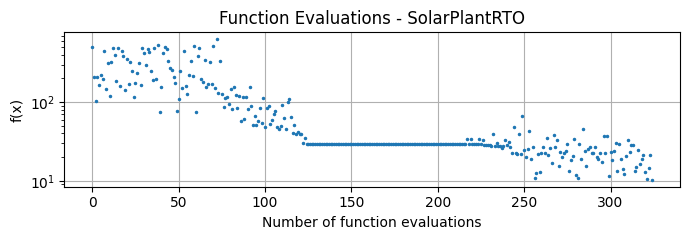

In [6]:
with problem as p:
    function_evaluations_plot(p)
plt.tight_layout()
plt.show()

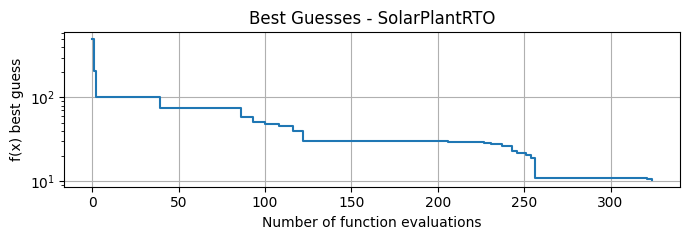

In [7]:
with problem as p:
    best_guesses_plot(p)
plt.tight_layout()
plt.show()

In [8]:
f_best, x_best = problem.best_guess
x_best = [float(xi) for xi in x]
f_best, x_best

(10.330904551206682,
 [0.5,
  0.917004705,
  0.886780974,
  0.853623916,
  0.826111695,
  0.801142972,
  0.783225649,
  0.760051185,
  0.900587117,
  0.884820289,
  0.85561633,
  0.827130134,
  0.797646554,
  0.78549898,
  0.755400025])

In [ ]:
with SolarPlantRTO() as problem:
    sol = solve_problem_with_optimizer(
        problem, 
        scipy.optimize.minimize, 
        x0=x_best, 
        bounds=problem.bounds, 
        tol=0.01, 
        options={'maxiter': 500}
    )
sol.status, sol.message

(0, 'CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH')

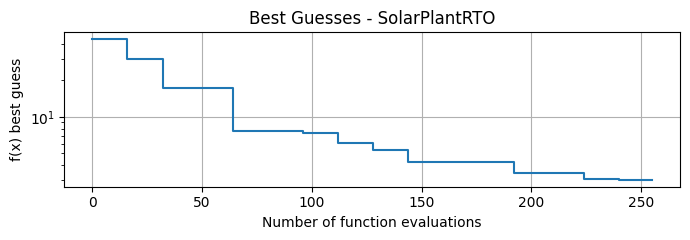

In [10]:
with problem as p:
    best_guesses_plot(p)
plt.tight_layout()
plt.show()

In [11]:
f_best, x_best = problem.best_guess
x_best = [float(xi) for xi in x]
f_best, x_best

(3.031189280696049,
 [0.5,
  0.917004705,
  0.886780974,
  0.853623916,
  0.826111695,
  0.801142972,
  0.783225649,
  0.760051185,
  0.900587117,
  0.884820289,
  0.85561633,
  0.827130134,
  0.797646554,
  0.78549898,
  0.755400025])

## Bayesian Optimization

In [ ]:
with SolarPlantRTO() as problem:
    sol = solve_problem_with_optimizer(
        problem,
        skopt.gp_minimize,
        dimensions=problem.bounds,
        n_calls=250,
        noise=0.0,
        n_initial_points=30
    )

c:\Users\BillTubbs\opt-problems\.venv\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension array([0., 1.]) was inferred to Real(low=0.0, high=1.0, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(np.float64(0.0), np.float64(1.0)), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\Users\BillTubbs\opt-problems\.venv\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension array([0.1, 1. ]) was inferred to Real(low=0.1, high=1.0, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(np.float64(0.1), np.float64(1.0)), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\Users\BillTubbs\opt-problems\.venv\Lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension array([0.1, 1. ]) was inferred to

AttributeError: status

In [16]:
sol['x'], sol['fun']

([0.7671217724306244,
  0.7653614367223145,
  0.829230883630137,
  0.8337676783428051,
  0.7489605689052173,
  0.9098378486451626,
  0.8110149321530967,
  0.7243343933494562,
  0.900335436810575,
  0.9031581025320758,
  0.8386454813383197,
  0.8172042755815941,
  0.8644002191035016,
  0.7648046048823979,
  0.7450120537211954],
 np.float64(9.533817096954554))

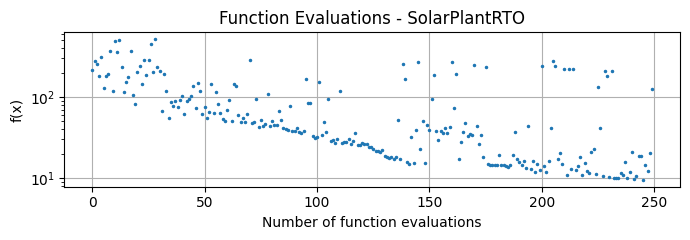

In [17]:
with problem as p:
    function_evaluations_plot(p)
plt.tight_layout()
plt.show()

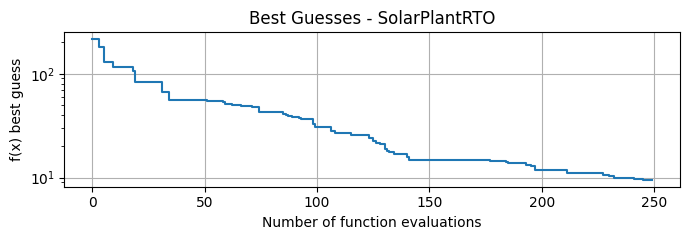

In [20]:
with problem as p:
    best_guesses_plot(p)
plt.tight_layout()
plt.show()

In [26]:
f_best, x_best = problem.best_guess
x_best = [float(xi) for xi in x]
f_best, x_best

(9.533817096954554,
 [0.5,
  0.917004705,
  0.886780974,
  0.853623916,
  0.826111695,
  0.801142972,
  0.783225649,
  0.760051185,
  0.900587117,
  0.884820289,
  0.85561633,
  0.827130134,
  0.797646554,
  0.78549898,
  0.755400025])